In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
d=pd.read_csv("nashik price.csv")
d.head()

,Unnamed: 0,address,owners,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,0,"Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...",Mahendra Kotwal,Apartment,old,3.0,75.00,39.72,1550.0,Sheetal Vihar,19.987960,73.787390
1,1,"Samraat Dream Citi, Samta Nagar, Nashik",Jiten Dadarkar,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,2,"Suryaprakash Apartment,Nashik Road, Nashik",Pankaj,Apartment,old,2.0,53.35,28.25,970.0,Surya Prakash,19.975850,73.788750
3,3,"Adishvar Residency,Nashik Road, Nashik",Saurav,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,4,"Nashik Road, Nashik",Vivek Pavanaskar,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890


In [3]:
d.shape

(5496, 12)

# Drop unnecessary columns

In [4]:
df1=d.drop('owners',axis=1)

In [5]:
df2=df1.drop('address',axis=1)

In [6]:
df=df2.drop('cordinates',axis=1)

In [7]:
df.head()

,Unnamed: 0,housetype,house_condition,BHK,price,per_month_emi,total_sqft,latitude,longitude
0,0,Apartment,old,3.0,75.00,39.72,1550.0,19.987960,73.787390
1,1,Apartment,old,2.0,41.00,21.71,1000.0,19.982460,73.811840
2,2,Apartment,old,2.0,53.35,28.25,970.0,19.975850,73.788750
3,3,Apartment,old,2.0,55.00,29.13,1000.0,19.930532,73.811734
4,4,Apartment,old,2.0,27.00,14.30,853.0,19.955310,73.840890


In [8]:
#now check shape
df.shape

(5496, 9)

In [9]:
#check size
df.size

49464

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5496 non-null   int64  
 1   housetype        5496 non-null   object 
 2   house_condition  5496 non-null   object 
 3   BHK              5333 non-null   float64
 4   price            4542 non-null   float64
 5   per_month_emi    4536 non-null   float64
 6   total_sqft       3985 non-null   float64
 7   latitude         5496 non-null   float64
 8   longitude        5496 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 386.6+ KB


# Checking the missing values in each column

In [11]:
df.isnull().sum()
#use df.isnull()where the volume present 
#due to df isnum().sum()

Unnamed: 0            0
housetype             0
house_condition       0
BHK                 163
price               954
per_month_emi       960
total_sqft         1511
latitude              0
longitude             0
dtype: int64

In [12]:
#fill agent mean value
mean_BHK=df['BHK'].mean()
df['BHK'].fillna(mean_BHK,inplace=True)
df['BHK'].head()

0    3.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: BHK, dtype: float64

In [13]:
mean_price =df['price'].mean()
df['price'].fillna(mean_price,inplace=True)
df['price'].head()

0    75.00
1    41.00
2    53.35
3    55.00
4    27.00
Name: price, dtype: float64

In [14]:
mean_per_month_emi=df['per_month_emi'].mean()
df['per_month_emi'].fillna(mean_per_month_emi,inplace=True)
df['per_month_emi'].head()

0    39.72
1    21.71
2    28.25
3    29.13
4    14.30
Name: per_month_emi, dtype: float64

In [15]:
mean_total_sqft=df['total_sqft'].mean()
df['total_sqft'].fillna(mean_total_sqft,inplace=True)
df['total_sqft'].head()

0    1550.0
1    1000.0
2     970.0
3    1000.0
4     853.0
Name: total_sqft, dtype: float64

In [16]:
mean_BHK=df.copy()

In [17]:
mean_price=df.copy()

In [18]:
mean_per_month_emi=df.copy()

In [19]:
mean_total_sqft=df.copy()

# Using Heatmap for Data cleaning

<Axes: >

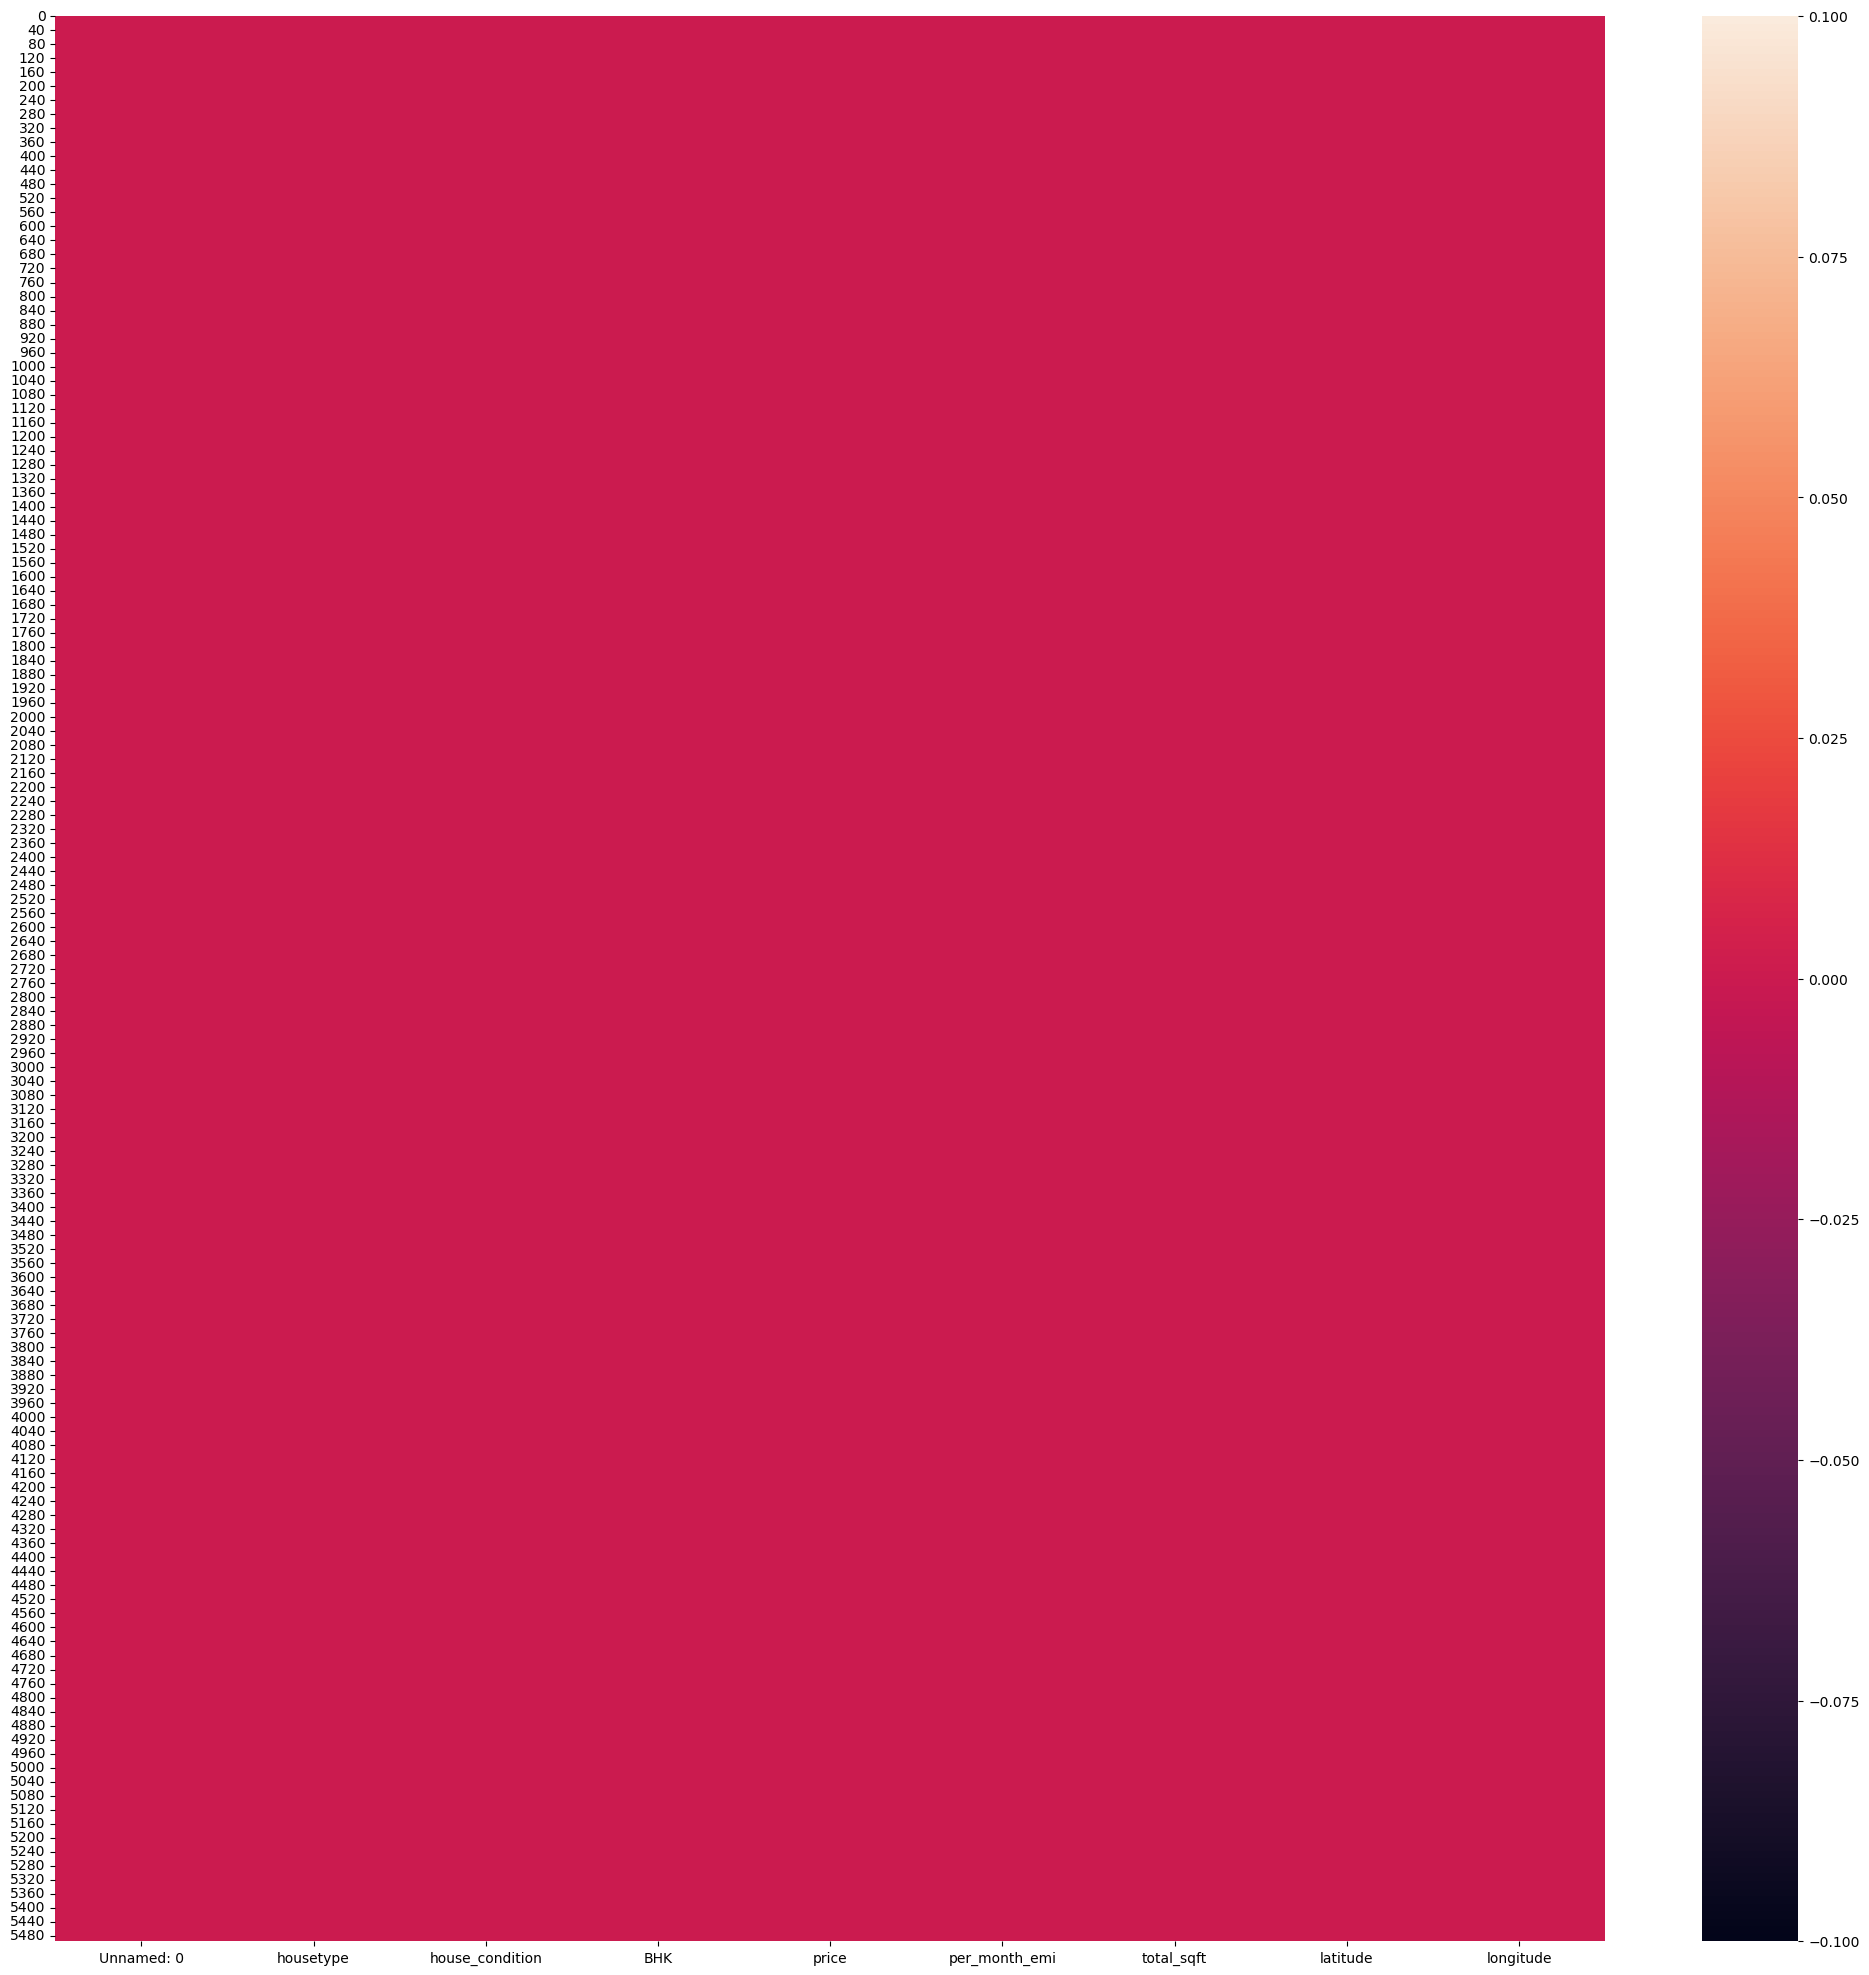

In [20]:
# using heatmap for data cleaning
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())
#you can observe the 

In [21]:
#to check missing data in percentage format we use following
#here we use df.shape df.shape[0] it means we want only rows and columns
null_var=df.isnull().sum()/df.shape[0]*100
null_var

Unnamed: 0         0.0
housetype          0.0
house_condition    0.0
BHK                0.0
price              0.0
per_month_emi      0.0
total_sqft         0.0
latitude           0.0
longitude          0.0
dtype: float64

<Axes: >

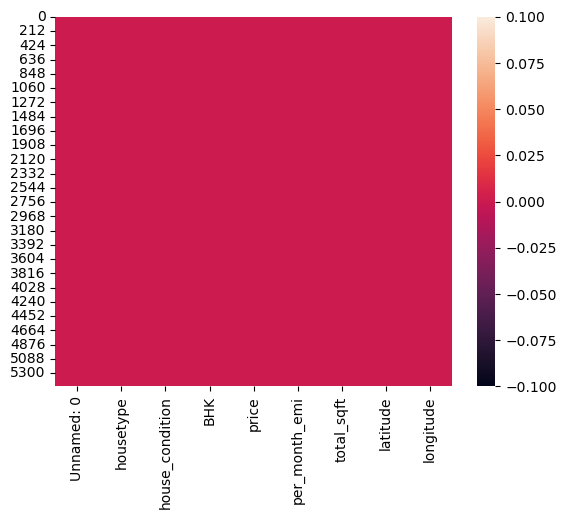

In [22]:
sns.heatmap(df.isnull())

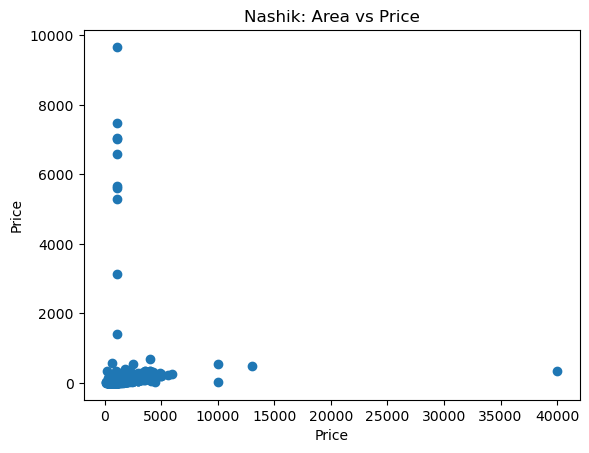

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=df["total_sqft"], y=df['price'])

plt.xlabel("Price")
plt.ylabel("Price")
plt.title("Nashik: Area vs Price");

Text(0, 0.5, 'count')

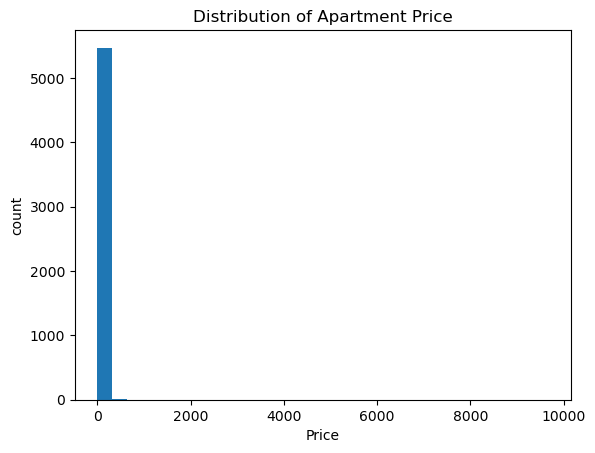

In [24]:
plt.hist(df['price'], bins=30)
plt.title("Distribution of Apartment Price") # provide title to graph

plt.xlabel("Price") #provide lable to x-axis

plt.ylabel('count') #provide lable to y-axis

Text(0.5, 1.0, 'Price vs EMI')

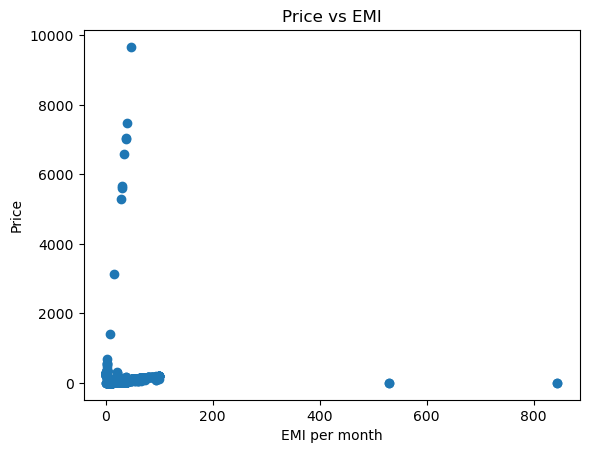

In [25]:
plt.scatter(df['per_month_emi'], df['price'])
plt.xlabel("EMI per month")
plt.ylabel('Price')
plt.title("Price vs EMI")

Text(0.5, 1.0, 'Price vs BHK')

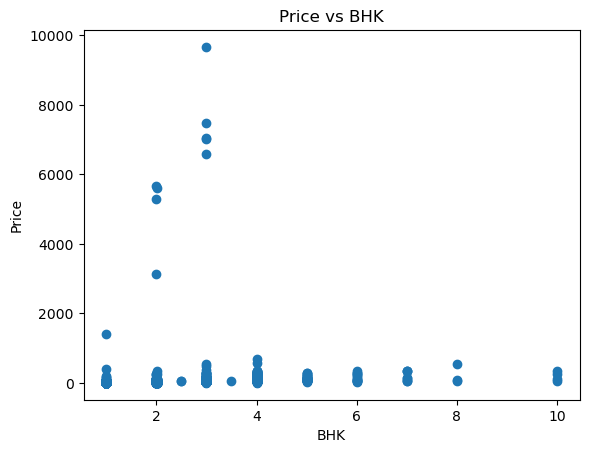

In [26]:
plt.scatter(df['BHK'], df['price'])
plt.xlabel("BHK")
plt.ylabel('Price')
plt.title("Price vs BHK")

# use dummy

In [27]:
df2 = df[[ 'housetype', 'house_condition',]]
df2.head()

,housetype,house_condition
0,Apartment,old
1,Apartment,old
2,Apartment,old
3,Apartment,old
4,Apartment,old


In [28]:
dummy_df=pd.get_dummies(df2)
dummy_df.head(4)


,housetype_Apartment,housetype_Independent house,house_condition_new,house_condition_old
0,True,False,False,True
1,True,False,False,True
2,True,False,False,True
3,True,False,False,True


In [29]:
dummy_df.keys()

Index(['housetype_Apartment', 'housetype_Independent house',
       'house_condition_new', 'house_condition_old'],
      dtype='object')

In [30]:
pd.get_dummies(df2,drop_first=True)

,housetype_Independent house,house_condition_old
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
5491,True,True
5492,True,True
5493,True,True
5494,True,True


In [31]:
df2_dummy=pd.DataFrame(df2,columns=['housetype_Apartment', 'housetype_Independent house',
       'house_condition_new', 'house_condition_old'])
      
df2_dummy.head(4)

,housetype_Apartment,housetype_Independent house,house_condition_new,house_condition_old
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


# using onehot encoding for convert all categorical columns into a numerical

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
oh_enc = OneHotEncoder(sparse=False,)

In [34]:
oh_enc_arr = oh_enc.fit_transform(df2)

oh_enc_arr


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.]])

In [35]:
dummy_df.keys()

Index(['housetype_Apartment', 'housetype_Independent house',
       'house_condition_new', 'house_condition_old'],
      dtype='object')

In [36]:
oh_enc = OneHotEncoder(sparse=False,drop='first')

In [37]:
oh_enc_arr = oh_enc.fit_transform(df2)

oh_enc_arr


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [38]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=[ 'housetype_Independent house', 'house_condition_old'],)
oh_enc_df


,housetype_Independent house,house_condition_old
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
5491,1.0,1.0
5492,1.0,1.0
5493,1.0,1.0
5494,1.0,1.0


In [39]:
df2['housetype'] = oh_enc_df[['housetype_Independent house']].copy()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1532\470552237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['housetype'] = oh_enc_df[['housetype_Independent house']].copy()


In [40]:
df2['house_condition'] = oh_enc_df[['house_condition_old']].copy()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1532\4288184843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['house_condition'] = oh_enc_df[['house_condition_old']].copy()


In [41]:
df.update(df2)

In [42]:
df

,Unnamed: 0,housetype,house_condition,BHK,price,per_month_emi,total_sqft,latitude,longitude
0,0,0.0,1.0,3.000000,75.000000,39.72000,1550.000000,19.987960,73.787390
1,1,0.0,1.0,2.000000,41.000000,21.71000,1000.000000,19.982460,73.811840
2,2,0.0,1.0,2.000000,53.350000,28.25000,970.000000,19.975850,73.788750
3,3,0.0,1.0,2.000000,55.000000,29.13000,1000.000000,19.930532,73.811734
4,4,0.0,1.0,2.000000,27.000000,14.30000,853.000000,19.955310,73.840890
...,...,...,...,...,...,...,...,...,...
5491,5491,1.0,1.0,4.000000,92.250000,45.80000,1109.826098,19.951040,73.756990
5492,5492,1.0,1.0,2.000000,55.241345,21.55192,1109.826098,20.031780,73.855100
5493,5493,1.0,1.0,2.000000,34.320000,18.17000,1109.826098,20.049050,73.796960
5494,5494,1.0,1.0,2.021658,55.241345,21.55192,1109.826098,20.027090,73.821100


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5496 non-null   int64  
 1   housetype        5496 non-null   object 
 2   house_condition  5496 non-null   object 
 3   BHK              5496 non-null   float64
 4   price            5496 non-null   float64
 5   per_month_emi    5496 non-null   float64
 6   total_sqft       5496 non-null   float64
 7   latitude         5496 non-null   float64
 8   longitude        5496 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 386.6+ KB


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# split data

In [45]:
X=df.drop("total_sqft", axis=1)
# to show the matrix we define x capital
# we drop total_sqft because it depended variables 
y=df["total_sqft"]
# y is show to vector for (depended variable)
print('shape of x= ', X.shape)
print('shape of y= ', y.shape)

shape of x=  (5496, 8)
shape of y=  (5496,)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2020)
print('shape of the X_train= ', X_train.shape)
print('shape of the y_train= ', y_train.shape)
print('shape of the X_test= ', X_test.shape)
print('shape of the y_test= ', y_test.shape)


shape of the X_train=  (4396, 8)
shape of the y_train=  (4396,)
shape of the X_test=  (1100, 8)
shape of the y_test=  (1100,)


In [48]:
sc=StandardScaler()
sc.fit(X_train)
          

StandardScaler()

In [49]:
sc.mean_

array([2.74826501e+03, 2.12465878e-01, 6.61510464e-01, 2.02815071e+00,
       5.36025215e+01, 2.16745721e+01, 1.99875621e+01, 7.36654431e+01])

In [50]:
sc.scale_

array([1.58861977e+03, 4.09052721e-01, 4.73195911e-01, 9.12963446e-01,
       2.43610680e+02, 2.40714974e+01, 5.25871894e-01, 3.60472252e+00])

In [51]:
X_train.describe()

,Unnamed: 0,BHK,price,per_month_emi,latitude,longitude
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,2748.265014,2.028151,53.602522,21.674572,19.987562,73.665443
std,1588.800487,0.913067,243.638393,24.074236,0.525932,3.605133
min,0.000000,1.000000,1.000000,1.050000,12.907250,-0.812310
25%,1371.750000,1.000000,23.500000,13.240000,19.959310,73.758972
50%,2763.500000,2.000000,38.000000,20.465000,19.981484,73.782900
75%,4113.500000,2.021658,55.241345,23.830000,20.012050,73.815510
max,5494.000000,10.000000,9668.000000,844.000000,32.113550,83.017410


In [52]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [53]:
X_train_sc = pd.DataFrame(X_train_sc, columns= ["BHK",'price', 'per_month_emi','housetype','house_condition','latitude','longitude','Unnamed'])
X_test_sc = pd.DataFrame(X_test_sc, columns= ["BHK",'price', 'per_month_emi','housetype','house_condition','latitude','longitude','Unnamed'])

In [54]:
X_train

,Unnamed: 0,housetype,house_condition,BHK,price,per_month_emi,latitude,longitude
116,116,0.0,1.0,2.0,28.00,14.83,19.973520,73.820300
3663,3663,0.0,0.0,2.0,65.50,34.69,19.983200,73.778830
3843,3843,0.0,0.0,3.0,75.00,39.72,19.986932,73.784932
3577,3577,0.0,0.0,1.0,16.00,8.47,19.988490,73.725050
5316,5316,1.0,1.0,4.0,75.00,39.72,19.951460,73.840690
...,...,...,...,...,...,...,...,...
1661,1661,0.0,1.0,2.0,27.50,14.56,20.045900,73.806560
2139,2139,0.0,1.0,2.0,25.44,8.92,20.016780,73.796650
3779,3779,0.0,0.0,3.0,59.00,31.24,20.012770,73.739920
4488,4488,1.0,0.0,3.0,56.00,29.66,20.036910,73.843840


In [55]:
X_train_sc.head()

,BHK,price,per_month_emi,housetype,house_condition,latitude,longitude,Unnamed
0,-1.656951,-0.519410,0.715326,-0.030834,-0.105096,-0.284343,-0.026702,0.042959
1,0.575805,-0.519410,-1.397963,-0.030834,0.048838,0.540699,-0.008295,0.031455
2,0.689111,-0.519410,-1.397963,1.064500,0.087835,0.749660,-0.001199,0.033148
3,0.521670,-0.519410,-1.397963,-1.126169,-0.154355,-0.548556,0.001765,0.016536
4,1.616331,1.925263,0.715326,2.159834,0.087835,0.749660,-0.068652,0.048616


# using LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X,y)

LinearRegression()

In [57]:
lr.coef_

array([ 8.23698725e-03,  1.45498473e+02,  9.98960893e+01,  3.59118092e+02,
        7.77772733e-02,  2.04572530e+00,  1.04915977e+01, -3.12098325e+00])

In [58]:
lr.intercept_

235.5915340585716

In [59]:
y_pred=(X_test)

In [60]:
lr.score(X_test,y_test)

0.27735262562744756

# using DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
regressor = DecisionTreeRegressor(criterion='squared_error')
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
y_test

802      700.000000
3374    1000.000000
2358    1109.826098
3278     691.000000
1945    1109.826098
           ...     
1966    1109.826098
720      650.000000
847      640.000000
2001    1109.826098
2559    1250.000000
Name: total_sqft, Length: 1100, dtype: float64

In [64]:
regressor.score(X_test,y_test)

0.3191534197182374

# using RandomForestRegressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
Regressor=RandomForestRegressor(criterion="squared_error")
Regressor.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
y_test

802      700.000000
3374    1000.000000
2358    1109.826098
3278     691.000000
1945    1109.826098
           ...     
1966    1109.826098
720      650.000000
847      640.000000
2001    1109.826098
2559    1250.000000
Name: total_sqft, Length: 1100, dtype: float64

In [68]:
Regressor.score(X_test,y_test)

0.3640112877939715

# Using Support Vector Regressor(SVR)

In [69]:
from sklearn.svm import SVR

In [70]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train) 

LinearRegression()

In [71]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.00982252530579164

In [72]:
svr_linear=SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

0.33376567419694503

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [74]:
y_pred=lr.predict(X_test)
#observation

In [75]:
y_pred=svr_linear.predict(X_test)
y_pred
#it check all independent variables
#by checking all the prediction

array([ 785.68826703, 1336.18264459,  777.46177982, ...,  698.48721125,
       1080.13012857, 1136.95960176])

In [76]:
y_test
#it shows you the original value 

802      700.000000
3374    1000.000000
2358    1109.826098
3278     691.000000
1945    1109.826098
           ...     
1966    1109.826098
720      650.000000
847      640.000000
2001    1109.826098
2559    1250.000000
Name: total_sqft, Length: 1100, dtype: float64

In [77]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 191.7783768404431


In [78]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 174880.82480787893


In [79]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 418.1875474089095


In [80]:
print("r_squared",r2_score(y_test,y_pred))

r_squared 0.33376567419694503


# using KNeighborsRegressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
regressor = KNeighborsRegressor(n_neighbors=9)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [84]:
sc.fit(X_train)

StandardScaler()

In [85]:
regressor.score(X_test,y_test)

0.429828472162896

# using k fold

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
score_lr=cross_val_score(KNeighborsRegressor(n_neighbors=100), X,y,cv=6)
print(score_lr)
print("Avg :",np.average(score_lr))

[-0.002409   -2.02993164 -0.11290474 -0.04209953 -0.13487652  0.0147811 ]
Avg : -0.38457338705637434


In [88]:
score_lr1=cross_val_score(KNeighborsRegressor(n_neighbors=100), X,y,cv=6)
print(score_lr1)
print("Avg :",np.average(score_lr1))

[-0.002409   -2.02993164 -0.11290474 -0.04209953 -0.13487652  0.0147811 ]
Avg : -0.38457338705637434


In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 191.7783768404431


In [91]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 174880.82480787893


In [92]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 418.1875474089095


In [93]:
print("R_Squared",r2_score(y_test,y_pred))

R_Squared 0.33376567419694503


# k fold on RandomForestRegressor

In [94]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=5),X_train,y_train,cv=5)
print(score_rf)
print("Avg:",np.average(score_rf))

[ 0.25935835  0.66290815 -0.17325701  0.50477879  0.18982155]
Avg: 0.28872196622786495


In [95]:
score_rf2=cross_val_score(RandomForestRegressor(n_estimators=100),X_train,y_train,cv=6)
print(score_rf2)
print("Avg:",np.average(score_rf2))

[ 0.50027107  0.56277854 -2.14830375  0.79626424  0.45527446  0.18244789]
Avg: 0.05812207491643595


# Thank You :)